# Introduction to the Project 

## HELOC 
A home equity line of credit, or HELOC, is a loan in which the lender agrees to lend a maximum amount within an agreed period (called a term), where the collateral is the borrower’s equity in his/her house (akin to a second mortgage). Because a home often is a consumer’s most valuable asset, many homeowners use home equity credit lines only for major items, such as education, home improvements, or medical bills, and choose not to use them for day-to-day expenses.

Since amount of such credit is not small, banks carefully review financial situation of applicants. Utmost care is taken so the whole process is transparent and decision is easily explainable to the client.

## My Dataset
I have take a subset of HELOC (Home Equity Line of Credit) Dataset. Given below are the column names that have been selected. These correspond to various attributes and features related to credit, payment history, and borrower behavior. 

### Dependent Variable
1. **ExternalRiskEstimate**: A risk assessment or credit score provided by an external source.

### Independent Variables

2. **MSinceOldestTradeOpen**: The number of months since the oldest trade line (credit account) was opened.

3. **MSinceMostRecentTradeOpen**: The number of months since the most recent trade line was opened.

4. **NumSatisfactoryTrades**: The number of satisfactory (positive) credit trades.

5. **NumTrades90Ever2DerogPubRec**: Number of trades that have experienced derogatory public records within the past 90 months. i.e. number of trades which are more than 90 past due

6. **PercentTradesNeverDelq**: Percentage of trades that have never been delinquent.

7. **MSinceMostRecentDelq**: The number of months since the most recent delinquency.

8. **NumTradesOpeninLast12M**: Number of credit trades opened in the last 12 months.

9. **MSinceMostRecentInqexcl7days**: The number of months since the most recent inquiry (excluding inquiries within the last 7 days).

10. **NumInqLast6M**: Number of inquiries in the last 6 months.

11. **NetFractionRevolvingBurden**: Portion of credit card spending that goes unpaid at the end of a billing cycle balance divided by credit limit

These columns seem to provide a comprehensive set of information about a borrower's credit history, payment behavior, and financial standing. 
We can use these columns to gain insights into the creditworthiness and risk associated with the borrowers in the dataset.

<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>


# SECTION 1 -  Exploratory Data analysis

### 1. Importing Libraries

In [1]:
import numpy as np  # for numerical calculations
import pandas as pd  # for handling data in tabular form
import matplotlib.pyplot as plt  # for creating visualizations
import seaborn as sns  # for enhanced data visualization

In [2]:
from optbinning import BinningProcess   # a custom library build to tackle binning!

from sklearn.linear_model import LogisticRegression  # for logistic regression modeling
from sklearn.metrics import classification_report  # for generating classification reports
from sklearn.metrics import auc, roc_auc_score, roc_curve  # for ROC curve and AUC calculations
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets

(CVXPY) Dec 26 08:37:40 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 26 08:37:40 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


### 2. Loading the Dataset

In [3]:
df = pd.read_csv(r'C:\Users\91989\OneDrive\Desktop\Python Importing Files Project\FICO_HELOC\Newdataset.csv')

### 3. Assigning Independent and Dependent Variables

In [4]:
# Define the list of variable names
variable_names = list(df.columns[1:])

# Create the predictor variable X as a NumPy array (matrix) - Works well with ML algorithms
X = df[variable_names].values

### 4. Transforming the categorical dichotomic target variable into numerical type.

In [5]:
y = df.RiskPerformance.values
mask = y == "Bad"
y[mask] = 1
y[~mask] = 0
y = y.astype(int)

In [6]:
# Create a DataFrame for X and y
data = pd.DataFrame(data=X, columns=variable_names)
data['RiskPerformance'] = y

In [7]:
df.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0               1                    55                    144   
1               1                    61                     58   
2               1                    67                     66   
3               1                    66                    169   
4               1                    81                    333   

   MSinceMostRecentTradeOpen  NumSatisfactoryTrades  \
0                          4                     20   
1                         15                      2   
2                          5                      9   
3                          1                     28   
4                         27                     12   

   NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  MSinceMostRecentDelq  \
0                            0                      83                     2   
1                            4                     100                    -7   
2                            0                     100                    -7   
3                            1                      93                    76   
4                            0                     100                    -7   

   NumTradesOpeninLast12M  MSinceMostRecentInqexcl7days  NumInqLast6M  \
0                       1                             0             0   
1                       0                             0             0   
2                       4                             0             4   
3                       3                             0             5   
4                       0                             0             1   

   NetFractionRevolvingBurden  
0                          33  
1                           0  
2                          53  
3                          72  
4                          51

### 5. EDA (Exploratory Data Analysis)

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
RiskPerformance                 0
ExternalRiskEstimate            0
MSinceOldestTradeOpen           0
MSinceMostRecentTradeOpen       0
NumSatisfactoryTrades           0
NumTrades90Ever2DerogPubRec     0
PercentTradesNeverDelq          0
MSinceMostRecentDelq            0
NumTradesOpeninLast12M          0
MSinceMostRecentInqexcl7days    0
NumInqLast6M                    0
NetFractionRevolvingBurden      0
dtype: int64


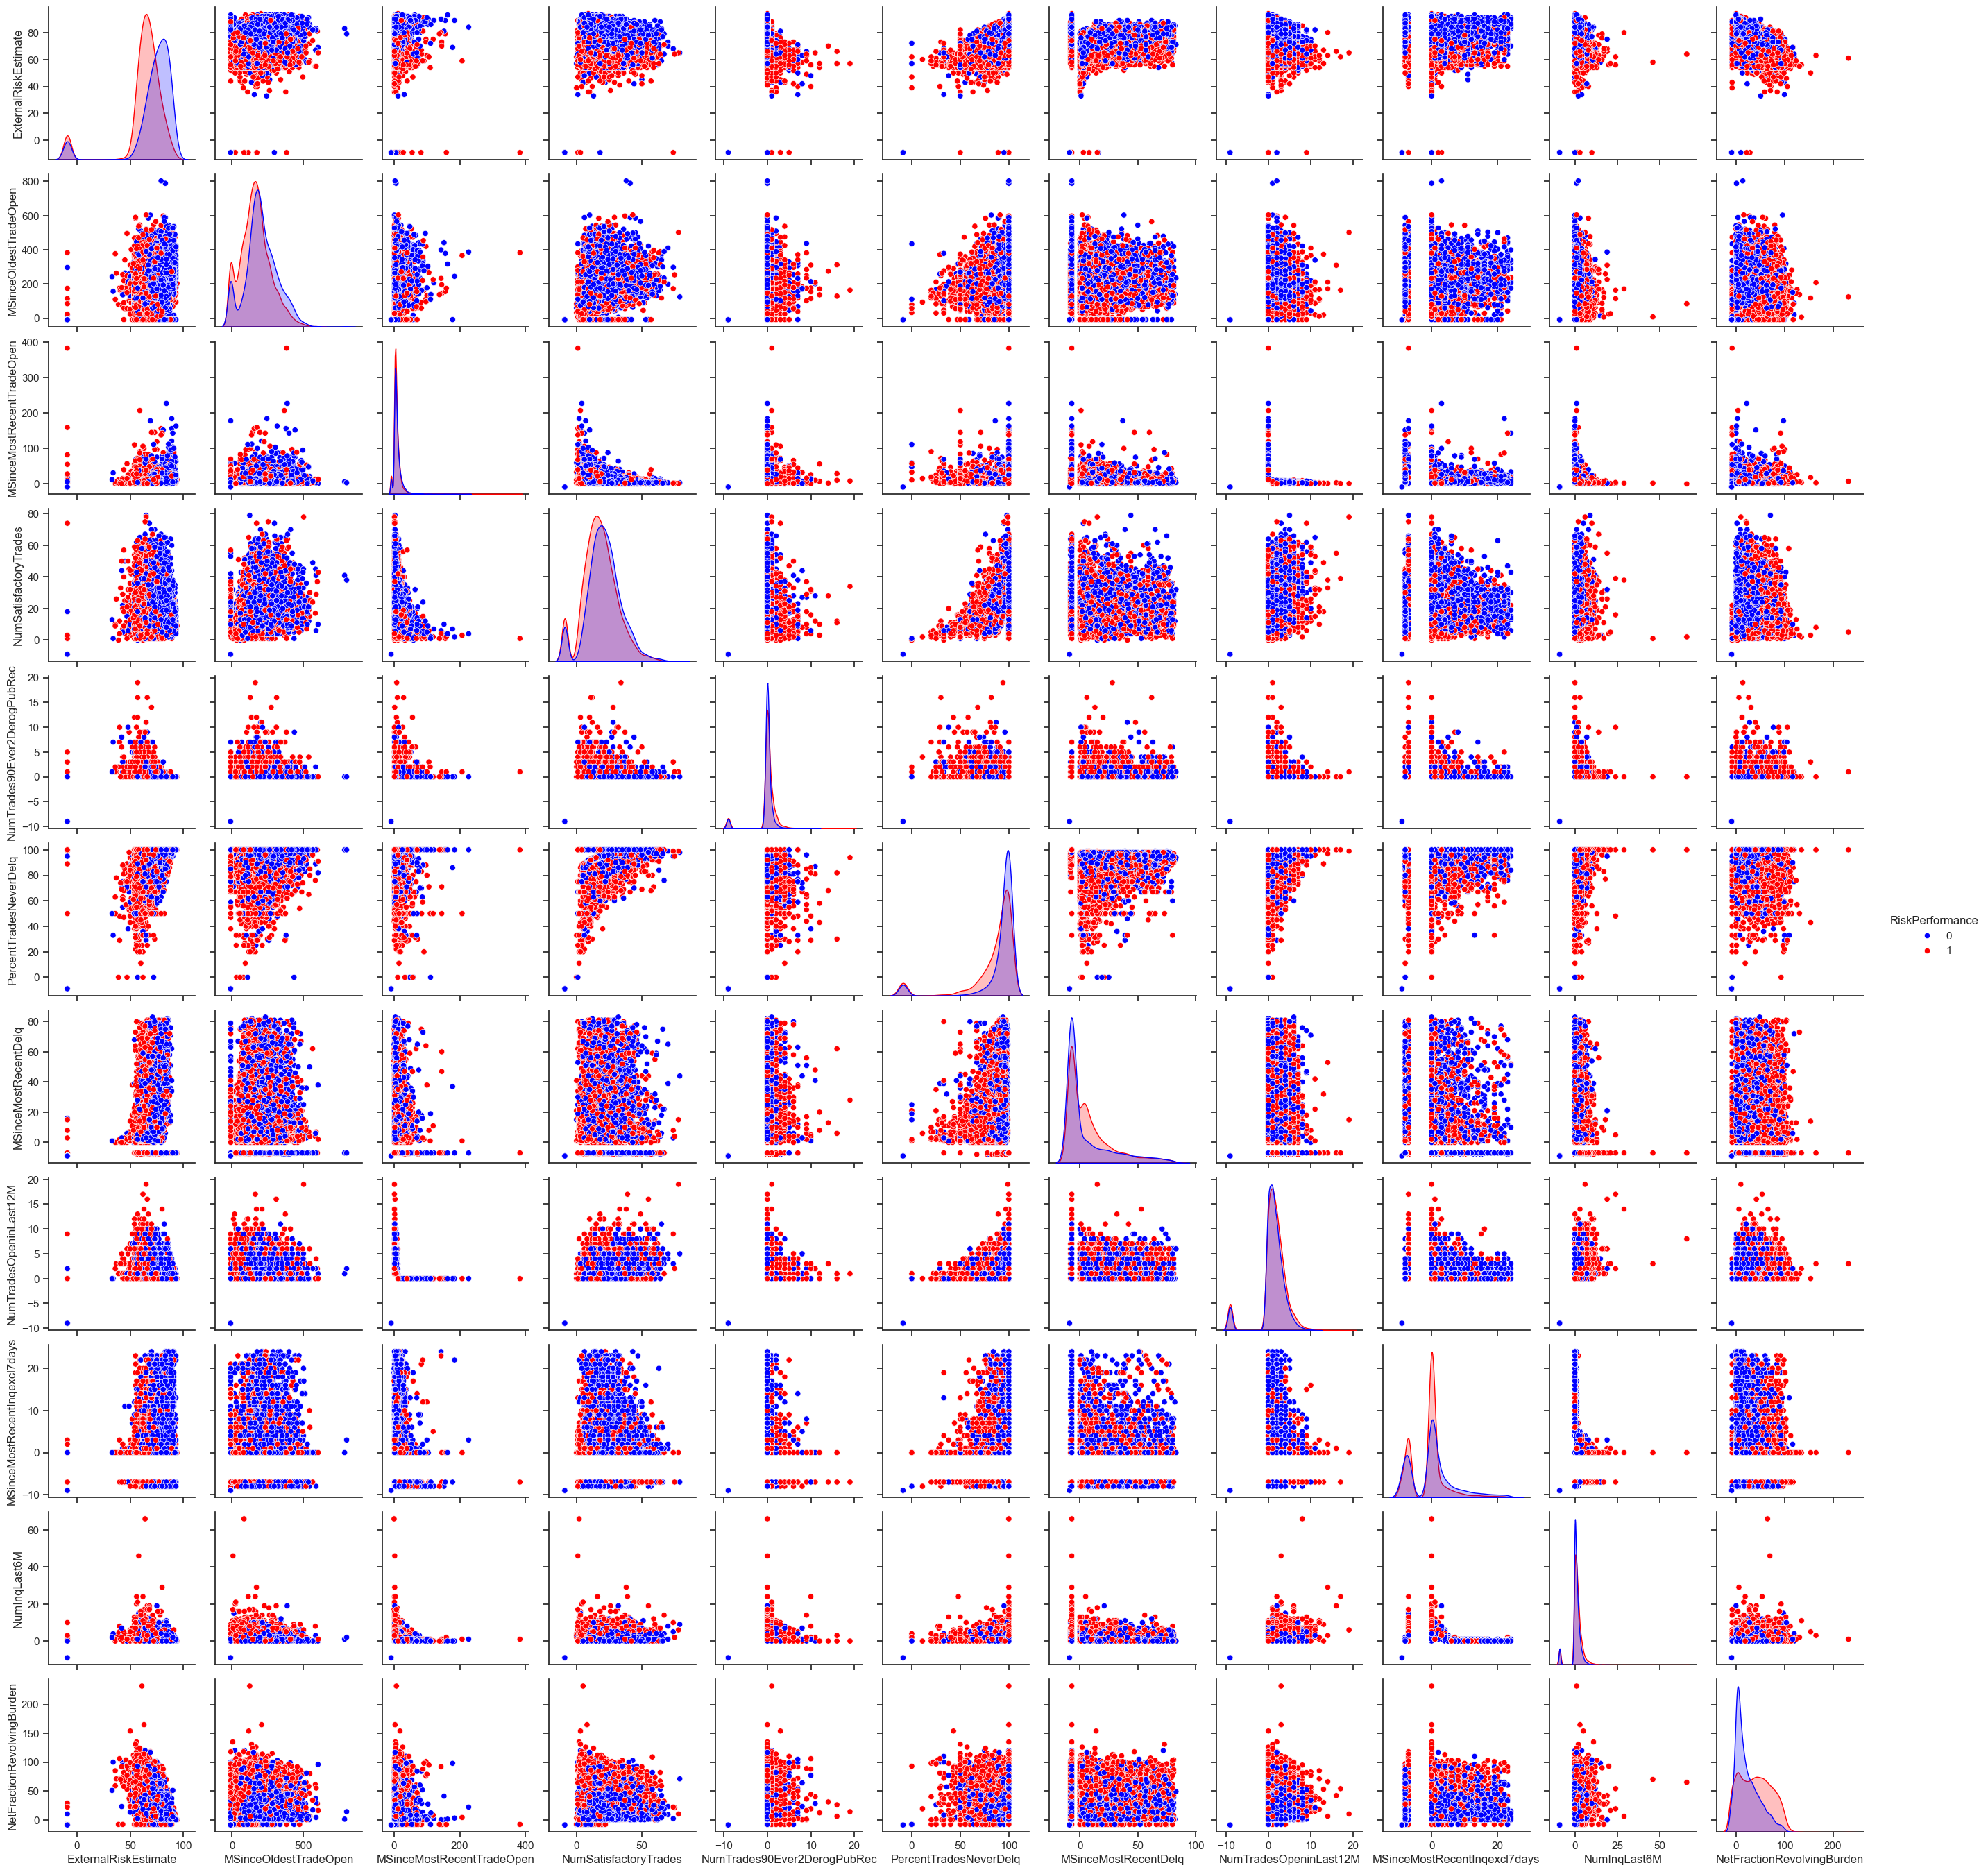

In [9]:
# Create a scatter plot matrix with different colors for 'goods' and 'bad'
sns.set(style="ticks")
sns.pairplot(data, hue="RiskPerformance", palette={0: "blue", 1: "red"})

# Show the plot
plt.show()

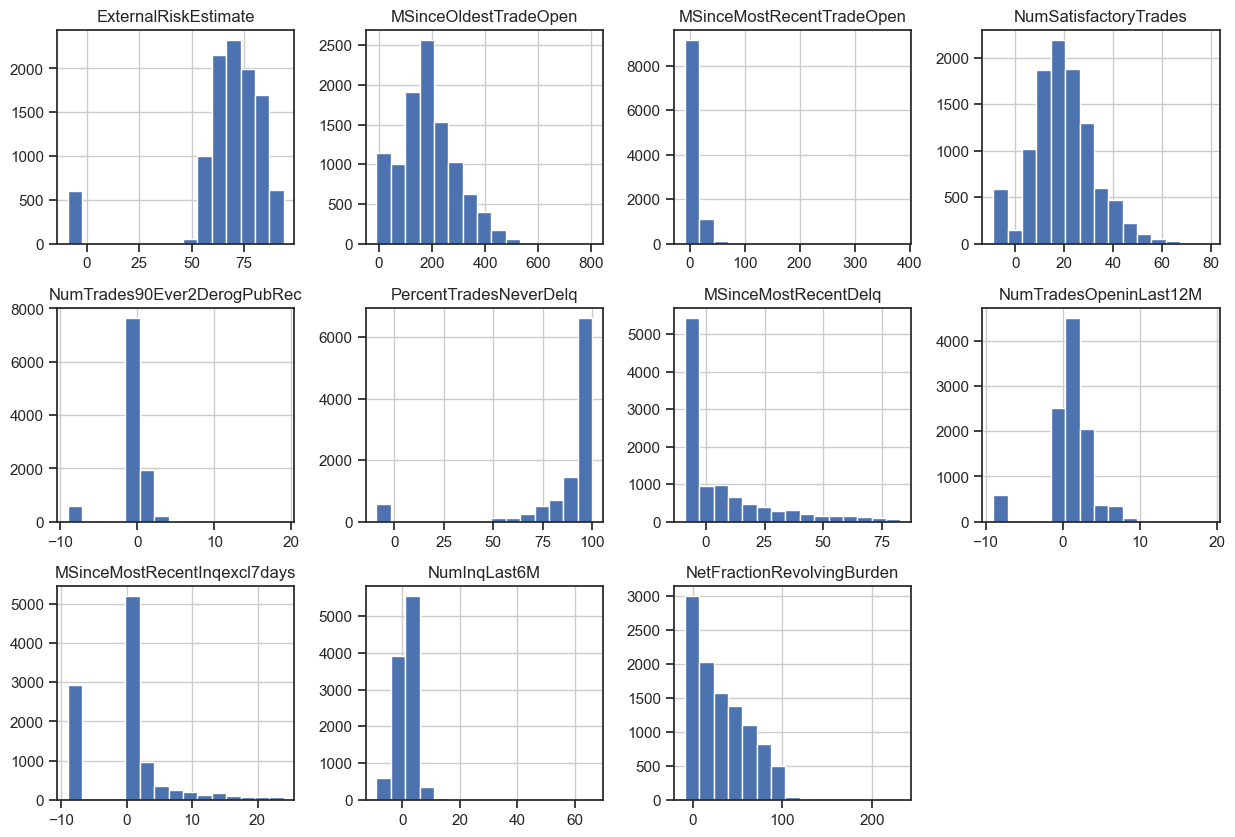

In [10]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number')

# Adjust the number of bins, figsize, and layout as needed
numerical_columns.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.show()

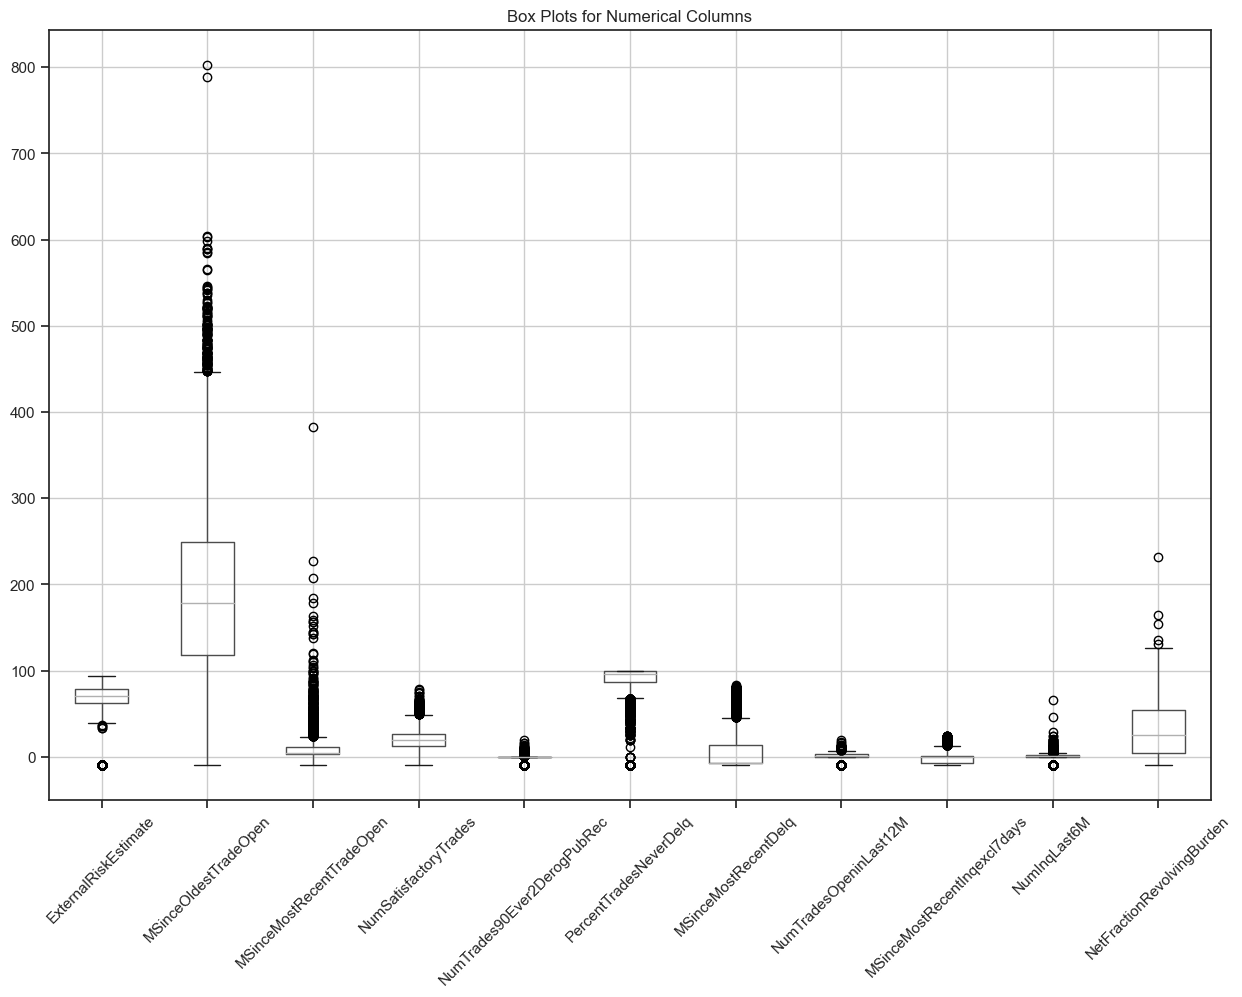

In [11]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number')

# Adjust the figsize as needed
plt.figure(figsize=(15, 10))

# Create box plots for numerical columns
numerical_columns.boxplot()
plt.title('Box Plots for Numerical Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>

# SECTION 2: Model Selection 

### 1. Incorporate Unique Conditions relating to the Model

Here we instantiate special codes, dictionary of binning parameters and a ***BinningProcess*** object class with variable names,. 

The data dictionary of this challenge includes three special values/codes: <BR>
-9 means No Bureau Record or No Investigation  <BR>
-8 means No Usable/Valid Trades or Inquiries   <BR>
-7 means Condition not Met (e.g. No Inquiries, No Delinquencies) 

In [12]:
# The Optbinning library helps consider these special codes
special_codes = [-9, -8, -7]

Noe that in ScoreCard building, we have monotonicity constraints with respect to the probability of a target for many of the variables. We apply these rules by passing the following dictionary of parameters for these variables involved.

This is mainly because we assume MONOTONICITY as LOGISTIC Regression assumes there must be a linear relationship between Logit f(x) and independent variables.

In [13]:
binning_fit_params = {
    "ExternalRiskEstimate": {"monotonic_trend": "descending"},
    "MSinceOldestTradeOpen": {"monotonic_trend": "descending"},
    "MSinceMostRecentTradeOpen": {"monotonic_trend": "descending"},
    "NumSatisfactoryTrades": {"monotonic_trend": "descending"},
    "NumTrades90Ever2DerogPubRec": {"monotonic_trend": "ascending"},
    "PercentTradesNeverDelq": {"monotonic_trend": "descending"},
    "MSinceMostRecentDelq": {"monotonic_trend": "descending"},
    "NumTradesOpeninLast12M": {"monotonic_trend": "ascending"},
    "MSinceMostRecentInqexcl7days": {"monotonic_trend": "descending"},
    "NumInqLast6M": {"monotonic_trend": "ascending"},
    "NetFractionRevolvingBurden": {"monotonic_trend": "ascending"},
}

In [14]:
binning_process = BinningProcess(variable_names, special_codes=special_codes,
                                 binning_fit_params=binning_fit_params)

### 2. Creating explainable model pipelines.

In [15]:
clf1 = LogisticRegression(solver="lbfgs")

clf2 = LogisticRegression(solver="lbfgs")

### 3. Split dataset into train and test AND fit pipelines with training data.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
binning_process.fit(X_train, y_train)

BinningProcess(binning_fit_params={'ExternalRiskEstimate': {'monotonic_trend': 'descending'},
                                   'MSinceMostRecentDelq': {'monotonic_trend': 'descending'},
                                   'MSinceMostRecentInqexcl7days': {'monotonic_trend': 'descending'},
                                   'MSinceMostRecentTradeOpen': {'monotonic_trend': 'descending'},
                                   'MSinceOldestTradeOpen': {'monotonic_trend': 'descending'},
                                   'NetFractionRevolving...
                                   'PercentTradesNeverDelq': {'monotonic_trend': 'descending'}},
               special_codes=[-9, -8, -7],
               variable_names=['ExternalRiskEstimate', 'MSinceOldestTradeOpen',
                               'MSinceMostRecentTradeOpen',
                               'NumSatisfactoryTrades',
                               'NumTrades90Ever2DerogPubRec',
                               'PercentTradesNeverDelq', '

Now, we replace the usual binning of a few numerical variables with a piecewise continuous binning. Since version 0.9.2, the binning process includes the method ***update_binned_variable*** which allows updating an optimal binning without the need of re-processing the rest of the variables.

### 4. Comparing the Performance of both Models

In [18]:
clf1.fit(binning_process.transform(X_train), y_train)

C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


LogisticRegression()

In [19]:
clf2.fit(X_train, y_train)

C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


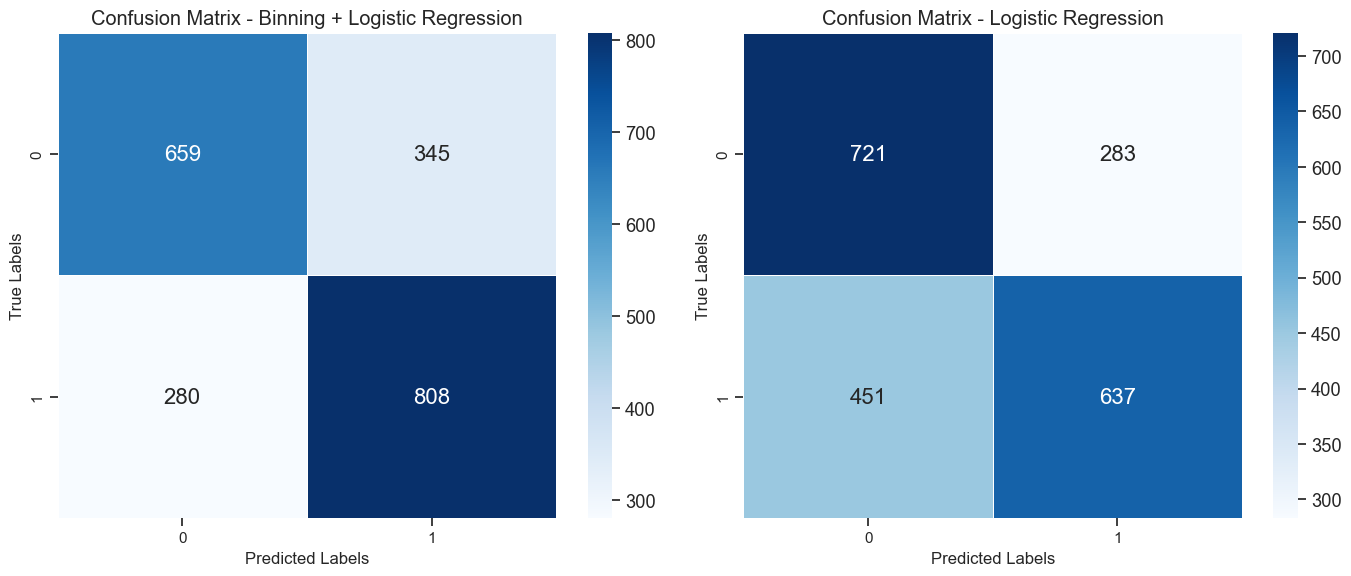

In [20]:
# Finding Confusion Matrix for both Models
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for both classifiers
y_pred1 = clf1.predict(binning_process.transform(X_test))
y_pred2 = clf2.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Function to plot a confusion matrix with labels
def plot_confusion_matrix(ax, cm, title):
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16}, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(title)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot confusion matrices on subplots
plot_confusion_matrix(axes[0], cm1, 'Confusion Matrix - Binning + Logistic Regression')
plot_confusion_matrix(axes[1], cm2, 'Confusion Matrix - Logistic Regression')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both confusion matrices
plt.show()

In [21]:
y_pred = clf1.predict(binning_process.transform(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1004
           1       0.70      0.74      0.72      1088

    accuracy                           0.70      2092
   macro avg       0.70      0.70      0.70      2092
weighted avg       0.70      0.70      0.70      2092



C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


In [22]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.72      0.66      1004
           1       0.69      0.59      0.63      1088

    accuracy                           0.65      2092
   macro avg       0.65      0.65      0.65      2092
weighted avg       0.66      0.65      0.65      2092



In [23]:
probs = clf1.predict_proba(binning_process.transform(X_test))
preds = probs[:,1]
fpr1, tpr1, threshold = roc_curve(y_test, preds)
roc_auc1 = auc(fpr1, tpr1)

probs = clf2.predict_proba(X_test)
preds = probs[:,1]
fpr2, tpr2, threshold = roc_curve(y_test, preds)
roc_auc2 = auc(fpr2, tpr2)

C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


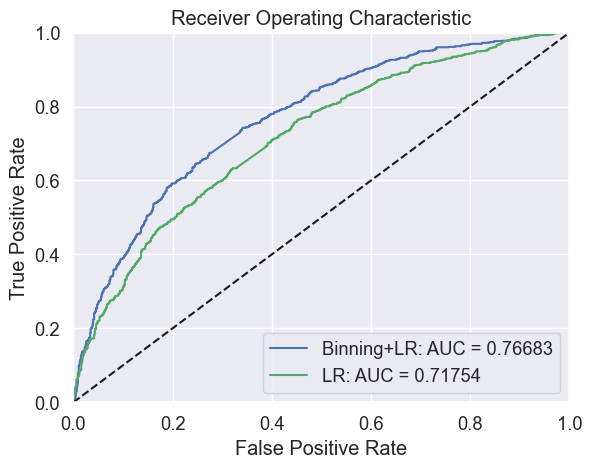

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='Binning+LR: AUC = {0:.5f}'.format(roc_auc1))
plt.plot(fpr2, tpr2, 'g', label='LR: AUC = {0:.5f}'.format(roc_auc2))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### So we choose the Logistic model with Binning in place of a model without Binning

### 5. Binning Process Statistics

The binning process of the pipeline can be retrieved to show analysis about any problems and to keep track of timings.

In [25]:
binning_process.information(print_level=2)

optbinning (Version 0.17.3)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                            no   * d
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                    no   * d
    fixed_variables                       no   * d
    categorical_variables                 no   * d
    special_codes                        yes   * U
    split_digits                          no   * d
    binning_fit_params                   yes   * U
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                   83

In [26]:
binning_process.summary()

name      dtype   status  selected n_bins  \
0           ExternalRiskEstimate  numerical  OPTIMAL      True     12   
1          MSinceOldestTradeOpen  numerical  OPTIMAL      True     11   
2      MSinceMostRecentTradeOpen  numerical  OPTIMAL      True      6   
3          NumSatisfactoryTrades  numerical  OPTIMAL      True     10   
4    NumTrades90Ever2DerogPubRec  numerical  OPTIMAL      True      3   
5         PercentTradesNeverDelq  numerical  OPTIMAL      True      8   
6           MSinceMostRecentDelq  numerical  OPTIMAL      True      7   
7         NumTradesOpeninLast12M  numerical  OPTIMAL      True      6   
8   MSinceMostRecentInqexcl7days  numerical  OPTIMAL      True      4   
9                   NumInqLast6M  numerical  OPTIMAL      True      4   
10    NetFractionRevolvingBurden  numerical  OPTIMAL      True      9   

          iv        js      gini quality_score  
0   1.018368  0.116638  0.534387      0.031792  
1   0.252786  0.030483   0.26474      0.027179  
2   0.019086  0.002377  0.065597      0.000556  
3   0.126726  0.015424  0.180888       0.00121  
4   0.133485  0.016301  0.155193      0.286527  
5   0.377803  0.045428  0.316946      0.101421  
6   0.289526  0.035246  0.272229      0.239494  
7    0.02353  0.002936   0.08377      0.007932  
8   0.166538   0.02046  0.211639      0.531041  
9   0.089956  0.011127  0.159369       0.32378  
10  0.574686  0.068232  0.410605      0.343593

### 6. Retrieve Binning Process Stats for EACH individual variable
The ***get_binned_variable*** method serves to retrieve an optimal binning object, which can be analyzed in detail afterward.

In [27]:
optb = binning_process.get_binned_variable("ExternalRiskEstimate")

In [28]:
optb.binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 59.50)    859   0.102665        120    739    0.860303   
1       [59.50, 63.50)    873   0.104338        181    692    0.792669   
2       [63.50, 65.50)    563   0.067288        153    410    0.728242   
3       [65.50, 67.50)    516   0.061671        157    359    0.695736   
4       [67.50, 70.50)    824   0.098482        307    517    0.627427   
5       [70.50, 72.50)    530   0.063344        258    272    0.513208   
6       [72.50, 74.50)    530   0.063344        265    265    0.500000   
7       [74.50, 77.50)    709   0.084738        423    286    0.403385   
8       [77.50, 80.50)    662   0.079120        454    208    0.314199   
9       [80.50, 83.50)    586   0.070037        433    153    0.261092   
10      [83.50, 86.50)    588   0.070276        484    104    0.176871   
11        [86.50, inf)    646   0.077208        552     94    0.145511   
12             Special    481   0.057488        209    272    0.565489   
13             Missing      0   0.000000          0      0    0.000000   
Totals                   8367   1.000000       3996   4371    0.522409   

             WoE        IV        JS  
0      -1.728108  0.240274  0.026779  
1      -1.251391  0.141433  0.016609  
2      -0.896021  0.049740  0.006017  
3      -0.737379  0.031591  0.003862  
4      -0.431497  0.017887  0.002219  
5       0.036855  0.000086  0.000011  
6       0.089698  0.000510  0.000064  
7       0.481078  0.019447  0.002408  
8       0.870257  0.057461  0.006964  
9       1.129998  0.082891  0.009843  
10      1.627392  0.158391  0.017868  
11      1.859951  0.216931  0.023779  
12      -0.17377  0.001725  0.000215  
13           0.0  0.000000  0.000000  
Totals            1.018368  0.116638

In [29]:
# We disable sns for the moment as OPTBINNING Library already gives plots.
sns.reset_orig()

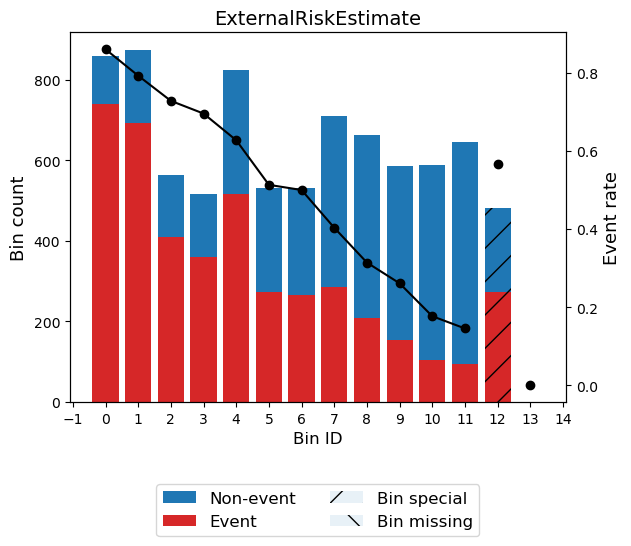

In [30]:
optb.binning_table.plot(metric="event_rate")

In [31]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.53438717
    IV (Jeffrey)             1.01836760
    JS (Jensen-Shannon)      0.11663793
    Hellinger                0.12163365
    Triangular               0.43294080
    KS                       0.39186716
    HHI                      0.08003168
    HHI (normalized)         0.00926489
    Cramer's V               0.47880467
    Quality score            0.03179204

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1    13.793539 0.000204  0.999937  0.000063
        1      2     7.959580 0.004783  0.997848  0.002152
        2      3     1.389298 0.238524  0.880941  0.119059
        3      4     6.540616 0.010544  0.995182  0.004818
        4      5    17.305249 0.000032  0.999996  0.000004
        5      6     0.1

<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>

# SECTION 3: Scorecard Building

Scorecard with binary target
The goal is to develop a scorecard using the logistic regression as an estimator.

### 1. Importing Libraries

In [32]:
from optbinning import BinningProcess
from optbinning import Scorecard

### 2. Loading the Dataset

In [33]:
df = pd.read_csv(r'C:\Users\91989\OneDrive\Desktop\Python Importing Files Project\FICO_HELOC\Newdataset.csv')

### 3. Assigning Independent and Dependent Variables

In [34]:
# Define the list of variable names
variable_names = list(df.columns[1:])

# Create the predictor variable X as a DataFrame - more suitable for data analysis & manipulation.
X = df[variable_names]
# Previously we created a predictor variable X as a NumPy array (matrix) ((X = df[variable_names].values))

### 4. Transforming the categorical dichotomic target variable into numerical type.

In [35]:
y = df.RiskPerformance.values
mask = y == "Bad"
y[mask] = 1
y[~mask] = 0
y = y.astype(int)

### 5. Incorporating Selection Criteria for importance of Variables
We specify a selection criteria in terms of the Information Value (IV) predictiveness and minimum quality score to remove low-quality variables.

In [36]:
selection_criteria = {
    "iv": {"min": 0.02, "max": 1},
    "quality_score": {"min": 0.01}
}

### 6. Instantiate the Binning Process
Then, we instantiate a ***BinningProcess*** object class with variable names, special codes and selection criteria.

In [37]:
binning_process = BinningProcess(variable_names, special_codes=special_codes,
                                 selection_criteria=selection_criteria)

### 7. Choosing a Suitable ML Model

In [38]:
# We select as an estimator a logistic regression to be solved using the non-linear solver L-BFGS-B.
estimator = LogisticRegression(solver="lbfgs")

### 8. Instantiate the Scorecard

We instantiate a Scorecard class with the target name, a binning process object, and an estimator. Also, we apply a scaling method to the scorecard points.

In [39]:
scorecard = Scorecard(binning_process=binning_process,
                      estimator=estimator, scaling_method="min_max",
                      scaling_method_params={"min": 300, "max": 850})   # To keep in the FICO Score Range

In [40]:
scorecard.fit(X, y, show_digits=4)

C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.02},
                                                             'quality_score': {'min': 0.01}},
                                         special_codes=[-9, -8, -7],
                                         variable_names=['ExternalRiskEstimate',
                                                         'MSinceOldestTradeOpen',
                                                         'MSinceMostRecentTradeOpen',
                                                         'NumSatisfactoryTrades',
                                                         'NumTrades90Ever2DerogPubRec',
                                                         'PercentTradesNeverDelq',
                                                         'MSinceMostRecentDelq',
                                                         'NumTradesOpeninLast12M',
           

### 9. Scorecard Process Statistics

Similar to other objects in OptBinning, we can print overview information about the options settings, problems statistics, and the number of selected variables after the binning process. 

With these settings, using the selection criteria, **1** variable is removed.

In [41]:
scorecard.information(print_level=2)

optbinning (Version 0.17.3)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                   min_max   * U
    scaling_method_params                yes   * U
    intercept_based                    False   * d
    reverse_scorecard                  False   * d
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  10459
    Number of variables                   11
    Target type                       binary

    Number of numerical                   11
    Number of categorical                  0
    Number of selected                    10

  Timing
    Total time                          0.79 sec
    Binning process                     0.72 sec   ( 92.08%)
    Estimator                           0.03 sec   (  3.57%

The method ***table*** returns the scorecard table. A scorecard table has a wide range of real-world business applications, being an interpretable tool to summarize relationships among variables. The scorecard table can handle binary and continuous targets. Two scorecard styles are available: ***style="summary"*** shows the variable name, and their corresponding bins and assigned points; ***style="detailed"*** adds information from the corresponding binning table.

In [42]:
scorecard.table(style="summary")

Variable                 Bin     Points
0         ExternalRiskEstimate     (-inf, 59.5000)  -0.977669
1         ExternalRiskEstimate  [59.5000, 63.5000)  13.164496
2         ExternalRiskEstimate  [63.5000, 65.5000)  28.059450
3         ExternalRiskEstimate  [65.5000, 67.5000)  31.805876
4         ExternalRiskEstimate  [67.5000, 70.5000)  44.674576
..                         ...                 ...        ...
6   NetFractionRevolvingBurden  [47.5000, 59.5000)  44.349812
7   NetFractionRevolvingBurden  [59.5000, 78.5000)  32.865622
8   NetFractionRevolvingBurden      [78.5000, inf)  14.386210
9   NetFractionRevolvingBurden             Special  61.086016
10  NetFractionRevolvingBurden             Missing  61.086016

[90 rows x 3 columns]

In [43]:
scorecard.table(style="detailed")

Variable  Bin id                 Bin  Count  Count (%)  \
0         ExternalRiskEstimate       0     (-inf, 59.5000)   1081   0.103356   
1         ExternalRiskEstimate       1  [59.5000, 63.5000)   1097   0.104886   
2         ExternalRiskEstimate       2  [63.5000, 65.5000)    681   0.065111   
3         ExternalRiskEstimate       3  [65.5000, 67.5000)    652   0.062339   
4         ExternalRiskEstimate       4  [67.5000, 70.5000)   1038   0.099245   
..                         ...     ...                 ...    ...        ...   
6   NetFractionRevolvingBurden       6  [47.5000, 59.5000)    977   0.093412   
7   NetFractionRevolvingBurden       7  [59.5000, 78.5000)   1181   0.112917   
8   NetFractionRevolvingBurden       8      [78.5000, inf)    966   0.092361   
9   NetFractionRevolvingBurden       9             Special    774   0.074003   
10  NetFractionRevolvingBurden      10             Missing      0   0.000000   

    Non-event  Event  Event rate       WoE        IV        JS  Coefficient  \
0         166    915    0.846438 -1.619109  0.217629  0.024574    -0.559475   
1         228    869    0.792160 -1.250170  0.142003  0.016678    -0.559475   
2         190    491    0.720999 -0.861592  0.044754  0.005427    -0.559475   
3         195    457    0.700920 -0.763856  0.034156  0.004169    -0.559475   
4         388    650    0.626204 -0.428139  0.017755  0.002203    -0.559475   
..        ...    ...         ...       ...       ...       ...          ...   
6         340    637    0.651996 -0.539996  0.026291  0.003247    -0.452361   
7         318    863    0.730737 -0.910536  0.086034  0.010398    -0.452361   
8         163    803    0.831263 -1.506777  0.172521  0.019732    -0.452361   
9         302    472    0.609819 -0.358724  0.009349  0.001162    -0.452361   
10          0      0    0.000000  0.000000  0.000000  0.000000    -0.452361   

       Points  
0   -0.977669  
1   13.164496  
2   28.059450  
3   31.805876  
4   44.674576  
..        ...  
6   44.349812  
7   32.865622  
8   14.386210  
9   61.086016  
10  61.086016  

[90 rows x 13 columns]

<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>

# SECTION 4: Deriving Business Implications

In [44]:
# Set pandas display options to show all rows without truncation
pd.set_option('display.max_rows', None)

# Display the detailed scorecard table
scorecard_table = scorecard.table(style="detailed")
scorecard_table

Variable  Bin id                   Bin  Count  \
0           ExternalRiskEstimate       0       (-inf, 59.5000)   1081   
1           ExternalRiskEstimate       1    [59.5000, 63.5000)   1097   
2           ExternalRiskEstimate       2    [63.5000, 65.5000)    681   
3           ExternalRiskEstimate       3    [65.5000, 67.5000)    652   
4           ExternalRiskEstimate       4    [67.5000, 70.5000)   1038   
5           ExternalRiskEstimate       5    [70.5000, 73.5000)   1011   
6           ExternalRiskEstimate       6    [73.5000, 75.5000)    607   
7           ExternalRiskEstimate       7    [75.5000, 78.5000)    795   
8           ExternalRiskEstimate       8    [78.5000, 80.5000)    588   
9           ExternalRiskEstimate       9    [80.5000, 84.5000)   1028   
10          ExternalRiskEstimate      10    [84.5000, 87.5000)    667   
11          ExternalRiskEstimate      11        [87.5000, inf)    616   
12          ExternalRiskEstimate      12               Special    598   
13          ExternalRiskEstimate      13               Missing      0   
0          MSinceOldestTradeOpen       0       (-inf, 62.5000)    542   
1          MSinceOldestTradeOpen       1    [62.5000, 91.5000)    594   
2          MSinceOldestTradeOpen       2   [91.5000, 119.5000)    702   
3          MSinceOldestTradeOpen       3  [119.5000, 134.5000)    555   
4          MSinceOldestTradeOpen       4  [134.5000, 147.5000)    536   
5          MSinceOldestTradeOpen       5  [147.5000, 169.5000)   1087   
6          MSinceOldestTradeOpen       6  [169.5000, 184.5000)    750   
7          MSinceOldestTradeOpen       7  [184.5000, 216.5000)   1369   
8          MSinceOldestTradeOpen       8  [216.5000, 263.5000)   1250   
9          MSinceOldestTradeOpen       9  [263.5000, 383.5000)   1723   
10         MSinceOldestTradeOpen      10       [383.5000, inf)    524   
11         MSinceOldestTradeOpen      11               Special    827   
12         MSinceOldestTradeOpen      12               Missing      0   
0      MSinceMostRecentTradeOpen       0        (-inf, 1.5000)    838   
1      MSinceMostRecentTradeOpen       1      [1.5000, 9.5000)   5927   
2      MSinceMostRecentTradeOpen       2     [9.5000, 19.5000)   2024   
3      MSinceMostRecentTradeOpen       3        [19.5000, inf)   1082   
4      MSinceMostRecentTradeOpen       4               Special    588   
5      MSinceMostRecentTradeOpen       5               Missing      0   
0          NumSatisfactoryTrades       0        (-inf, 5.5000)    539   
1          NumSatisfactoryTrades       1      [5.5000, 8.5000)    621   
2          NumSatisfactoryTrades       2     [8.5000, 11.5000)    832   
3          NumSatisfactoryTrades       3    [11.5000, 13.5000)    686   
4          NumSatisfactoryTrades       4    [13.5000, 17.5000)   1444   
5          NumSatisfactoryTrades       5    [17.5000, 21.5000)   1441   
6          NumSatisfactoryTrades       6    [21.5000, 24.5000)    991   
7          NumSatisfactoryTrades       7    [24.5000, 31.5000)   1671   
8          NumSatisfactoryTrades       8    [31.5000, 38.5000)    867   
9          NumSatisfactoryTrades       9        [38.5000, inf)    779   
10         NumSatisfactoryTrades      10               Special    588   
11         NumSatisfactoryTrades      11               Missing      0   
0    NumTrades90Ever2DerogPubRec       0        (-inf, 0.5000)   7639   
1    NumTrades90Ever2DerogPubRec       1      [0.5000, 1.5000)   1436   
2    NumTrades90Ever2DerogPubRec       2         [1.5000, inf)    796   
3    NumTrades90Ever2DerogPubRec       3               Special    588   
4    NumTrades90Ever2DerogPubRec       4               Missing      0   
0         PercentTradesNeverDelq       0       (-inf, 69.5000)    546   
1         PercentTradesNeverDelq       1    [69.5000, 83.5000)   1089   
2         PercentTradesNeverDelq       2    [83.5000, 88.5000)    710   
3         PercentTradesNeverDelq       3    [88.5000, 91.5000)    611   
4        

### 1. Group the variable using aggregate Information Value (I.V.) and Logistic Coefficient


In [45]:
variable_iv_coeff = scorecard_table.groupby("Variable").agg({"IV": "sum", "Coefficient": "mean"})
print(variable_iv_coeff)

                                    IV  Coefficient
Variable                                           
ExternalRiskEstimate          0.967073    -0.559475
MSinceMostRecentDelq          0.264514    -0.358958
MSinceMostRecentInqexcl7days  0.174674    -0.703962
MSinceMostRecentTradeOpen     0.021354    -0.665205
MSinceOldestTradeOpen         0.227801    -0.500668
NetFractionRevolvingBurden    0.546511    -0.452361
NumInqLast6M                  0.089619    -0.377048
NumSatisfactoryTrades         0.120249    -0.817250
NumTrades90Ever2DerogPubRec   0.126060     0.061717
PercentTradesNeverDelq        0.347495    -0.255947


### 2. Plotting Feature Importances for Business Analysis

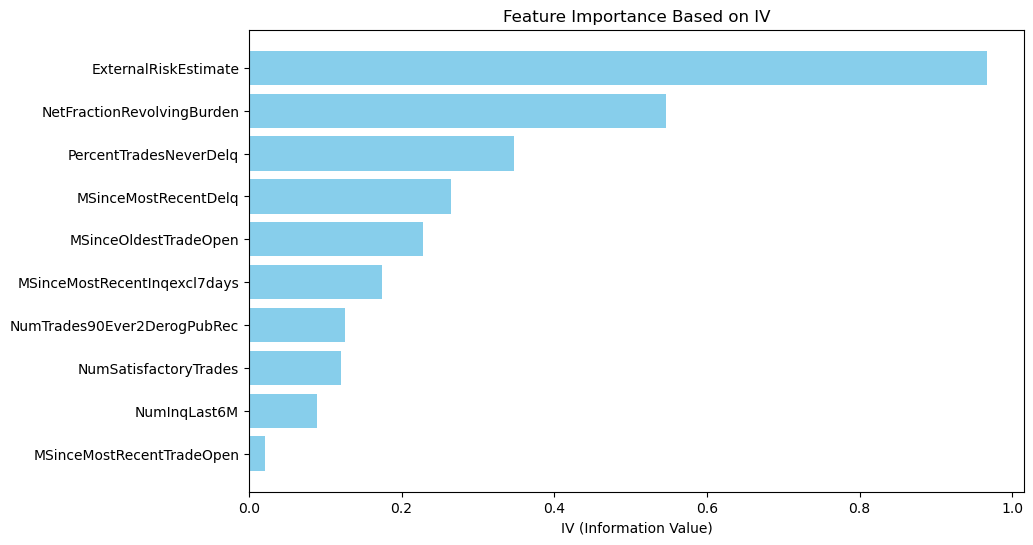

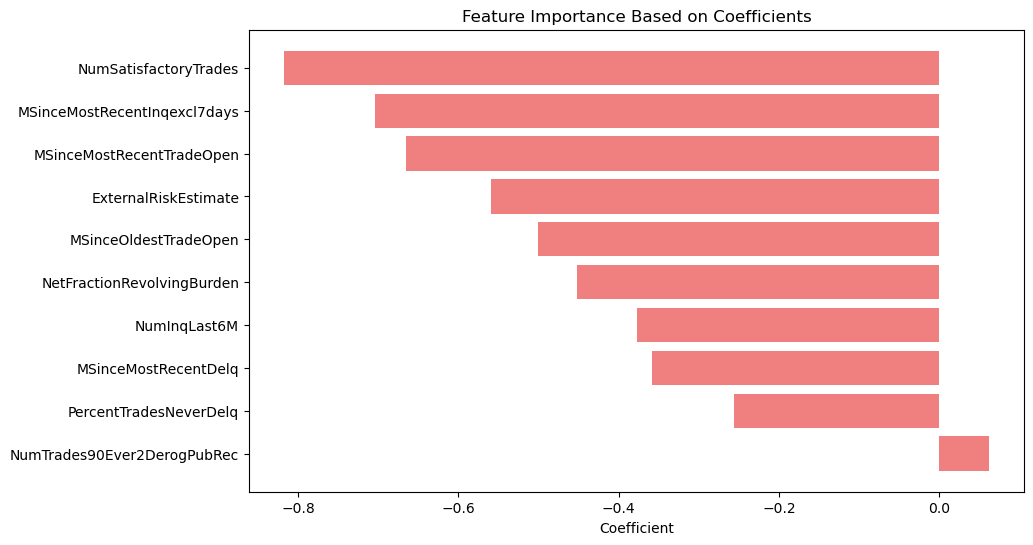

In [46]:
# Sort the DataFrame by IV in descending order
sorted_iv_coeff = variable_iv_coeff.sort_values(by='IV', ascending=False)

# Plot feature importance based on IV
plt.figure(figsize=(10, 6))
plt.barh(sorted_iv_coeff.index, sorted_iv_coeff['IV'], color='skyblue')
plt.xlabel('IV (Information Value)')
plt.title('Feature Importance Based on IV')
plt.gca().invert_yaxis()
plt.show()


# Sort the DataFrame by the absolute values of Coefficients in descending order
sorted_iv_coeff['Abs_Coefficient'] = abs(sorted_iv_coeff['Coefficient'])
sorted_iv_coeff = sorted_iv_coeff.sort_values(by='Abs_Coefficient', ascending=False)

# Plot feature importance based on Coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_iv_coeff.index, sorted_iv_coeff['Coefficient'], color='lightcoral')
plt.xlabel('Coefficient')
plt.title('Feature Importance Based on Coefficients')
plt.gca().invert_yaxis()
plt.show()

For business analysis, we consider using ONLY Information Value (IV) for feature importance as IV is specifically designed for assessing the predictive power of variables in logistic regression models and is widely used in credit scoring and risk assessment. It provides a more direct measure of the variables' impact on the target variable (e.g., default or non-default) and helps identify the most influential features for decision-making. **Logistic regression coefficients can be affected by variable scaling and multicollinearity, making IV a more robust choice for feature importance in this context.**

Based on the provided data with Information Value (IV) and Logistic Regression Coefficients, here are some business implications:
### Important Variables for Business Standpoint
1. **External Risk Estimate (IV: 0.97)**: A higher External Risk Estimate indicates a lower credit risk. Consider offering more favorable terms (e.g., lower interest rates) to customers with higher External Risk Estimates. This can attract low-risk borrowers and reduce default rates.

2. **Manage Revolving Burden (IV: 0.55)**: Customers with a high revolving burden (high credit card balances) are riskier. Encourage responsible credit card use and educate customers on managing their balances effectively.

3. **Percent of Trades Never Delinquent (IV: 0.35)**: Customers with a high percentage of non-delinquent trades are lower risk. Offer benefits or lower rates to customers with a strong history of on-time payments.

### Other Variables to Look out for

1. **Recent Delinquencies Matter (IV: 0.26)**: Pay close attention to customers with a recent history of delinquencies. Implement proactive customer support or targeted promotions to help them get back on track and reduce the risk of default.

2. **Oldest Trade Open (IV: 0.23)**: Longer credit histories indicate stability. Consider offering incentives or preferential terms to customers with longer trade histories to attract loyal, low-risk customers.

3. **Short Time Since Recent Inquiries (IV: 0.17)**: Customers with frequent recent credit inquiries may represent higher credit risk. Implement stricter approval criteria or adjust interest rates for this segment to mitigate potential default.

### Remaining Variables

1. **Inquiries in the Last 6 Months (IV: 0.09)**: Be cautious with customers who have had multiple inquiries in the last six months. They may be actively seeking credit and could be higher risk. Evaluate their creditworthiness more carefully.

2. **Satisfactory Trades (IV: 0.12)**: Customers with a higher number of satisfactory trades are less likely to default. Consider offering incentives or rewards for maintaining a positive trade history.

3. **Trades with Derogatory Records (IV: 0.13, Coefficient: 0.06)**: While the IV suggests importance, the coefficient is low. Monitor this variable but focus on other high-impact factors for now.

 
These implications provide a simple and actionable strategy to manage credit risk and make data-driven decisions to reduce defaults and attract valuable customers.

<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>

# SECTION 5: Scorecard performance (Model Validation) 

### 1. Computing predicted probabilities of the fitted estimator.

In [47]:
df = pd.read_csv(r'C:\Users\91989\OneDrive\Desktop\Python Importing Files Project\FICO_HELOC\Newdataset.csv')

In [48]:
y_pred = scorecard.predict_proba(X)[:, 1]

C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
from sklearn.linear_model import LogisticRegression

from optbinning import BinningProcess
from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

### 2. Plotting Classification Curves to measure Performance

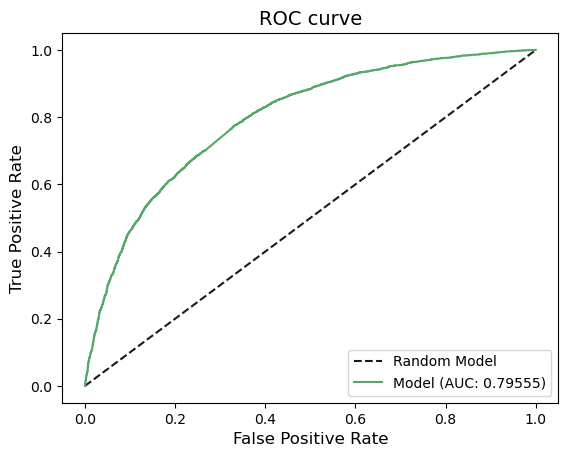

In [51]:
plot_auc_roc(y, y_pred)
plt.show()

AUC-ROC (Area Under the Receiver Operating Characteristic Curve):

* **Significance**: AUC-ROC is a widely used metric in credit scoring and scorecard development. It evaluates the model's ability to discriminate between good and bad instances (e.g., creditworthy vs. non-creditworthy customers). It shows how well the model separates positive and negative cases across different probability thresholds.
* **Usefulness**: AUC-ROC provides an overall measure of the model's discriminative power but doesn't take into account the specific thresholds for decision-making. It's a good initial indicator of model performance.

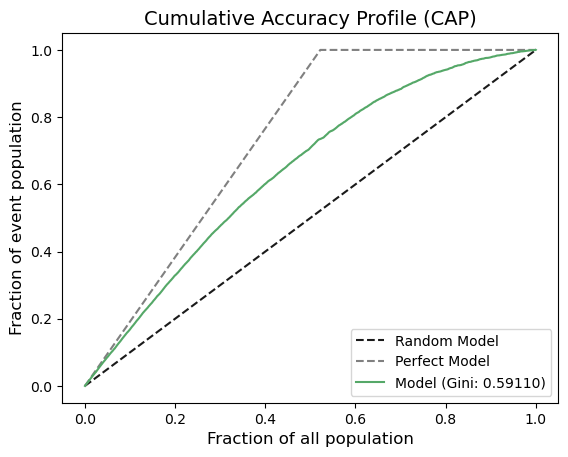

In [52]:
plot_cap(y, y_pred)
plt.show()

CAP Profile (Cumulative Accuracy Profile):

* **Significance**: The CAP curve compares the cumulative percentage of positive outcomes against the cumulative percentage of cases targeted by the model. It helps understand how well the model is performing compared to random selection.
* **Usefulness**: The CAP curve allows you to assess how effective your model is at differentiating high-risk cases early. It's particularly relevant in credit scoring to evaluate the model's calibration and the proportion of default cases captured.

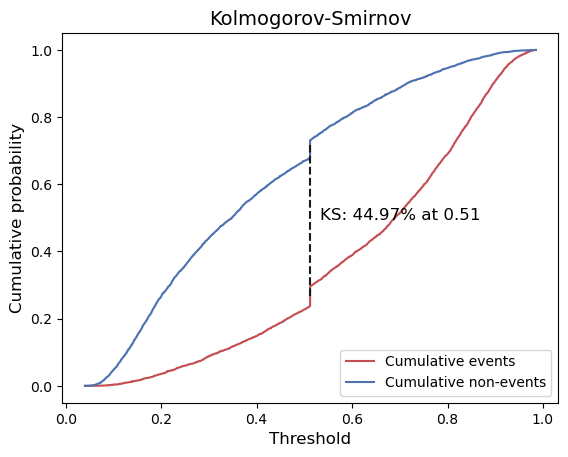

In [53]:
plot_ks(y, y_pred)
plt.show()

KS Curve (Kolmogorov-Smirnov Curve):

* **Significance**: The KS statistic is often used in credit scoring to assess the separation between the cumulative distributions of good and bad instances. The KS curve visualizes this separation and helps in identifying an optimal cutoff threshold for making decisions.
* **Usefulness**: The point on the KS curve where the separation between the distributions is highest indicates the cutoff threshold that optimally balances between false positives and false negatives. It's valuable for determining the practical threshold for the scorecard.

### Calculate the score of the dataset and plot distribution of scores for event and non-event records.

In [54]:
score = scorecard.score(X)

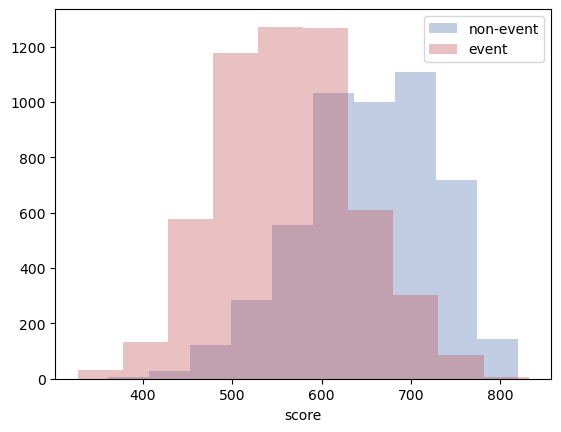

In [55]:
mask = y == 0
plt.hist(score[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score")
plt.legend()
plt.show()

<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>

# SECTION 6: ScoreCard Insights 

### 1. Sanity Checking
We can start noticing that after a score of 630 we see a considerable decline in Events (Defaults) and keeps on decling as the Score increases.

Complaring with General FICO Score distribution Chart this score is approxiamately at the middle of the FAIR Score range.

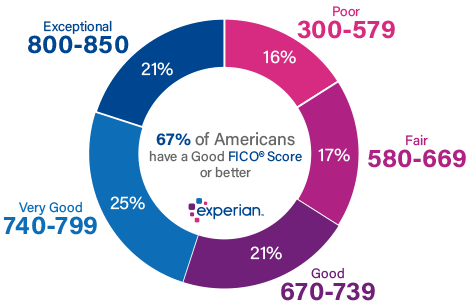

### 2. Data Analysis on Probability of Defaults

In [56]:
scorecard.score(X)

array([495.90187264, 489.5607427 , 485.15864432, ..., 665.73558869,
       703.29697727, 468.22198238])

In [57]:
# As we have already fitted the scorecard model as 'scorecard'
# Calculate the predicted probabilities of default for all individuals
pred = scorecard.predict_proba(X)[:, 1]

# Create a DataFrame to display the individual scores and predicted probabilities
individual_scores_df = pd.DataFrame({
    "Individual_Score": scorecard.score(X),  # Scores from the scorecard
    "Probability_of_Default": pred,  # Predicted probabilities
    "RiskPerformance": y # Original RiskPerformance labels
})

# Display the individual scores and predicted probabilities
print(individual_scores_df)

# Export the DataFrame to a CSV file if needed
individual_scores_df.to_csv("individual_scores_with_probabilities.csv", index=False)

C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


       Individual_Score  Probability_of_Default  RiskPerformance
0            495.901873                0.848863                1
1            489.560743                0.860358                1
2            485.158644                0.867900                1
3            524.970076                0.786078                1
4            657.398806                0.347189                1
5            489.881923                0.859793                1
6            426.387298                0.939364                0
7            558.786404                0.691657                0
8            494.660572                0.851173                1
9            477.404647                0.880343                1
10           644.448774                0.391168                0
11           461.639646                0.902541                1
12           641.560585                0.401252                1
13           608.181855                0.521718                0
14           493.347614  

In [58]:
# Load the individual_scores_df DataFrame from the CSV file
individual_scores_df = pd.read_csv("individual_scores_with_probabilities.csv")  # Load the updated DataFrame

# Group the DataFrame by 'RiskPerformance' (1 for defaulters, 0 for non-defaulters)
grouped = individual_scores_df.groupby('RiskPerformance')

# Calculate descriptive statistics for scores of defaulters
defaulters_score_stats = grouped.get_group(1)["Individual_Score"].describe()

# Calculate descriptive statistics for scores of non-defaulters
non_defaulters_score_stats = grouped.get_group(0)["Individual_Score"].describe()

# Calculate descriptive statistics for probabilities of default for defaulters
defaulters_prob_stats = grouped.get_group(1)["Probability_of_Default"].describe() * 100  # Multiply by 100 to convert to percentages

# Calculate descriptive statistics for probabilities of default for non-defaulters
non_defaulters_prob_stats = grouped.get_group(0)["Probability_of_Default"].describe() * 100  # Multiply by 100 to convert to percentages

# Create DataFrames for descriptive statistics
score_stats_df = pd.DataFrame({
    'Defaulters Scores': defaulters_score_stats,
    'Non-Defaulters Scores': non_defaulters_score_stats
})

prob_stats_df = pd.DataFrame({
    'Defaulters PD%': defaulters_prob_stats,
    'Non-Defaulters PD%': non_defaulters_prob_stats
})

# Concatenate DataFrames (Side By Side Data Tables)
concatenated_df = pd.concat([score_stats_df, prob_stats_df], axis=1)

# Display the concatenated table without styling
concatenated_df

Defaulters Scores  Non-Defaulters Scores  Defaulters PD%  \
count        5459.000000            5000.000000   545900.000000   
mean          562.576782             652.370643       64.686539   
std            77.084775              76.099033       21.524161   
min           326.881745             360.670899        4.018961   
25%           506.856422             605.835924       51.195705   
50%           559.461398             657.263159       68.955244   
75%           610.860163             712.643980       82.718739   
max           831.542265             819.924276       98.511850   

       Non-Defaulters PD%  
count       500000.000000  
mean            38.555580  
std             22.228791  
min              4.726544  
25%             19.189435  
50%             34.763813  
75%             53.025514  
max             97.586058

### 3. Data Analysis on Credit Scores

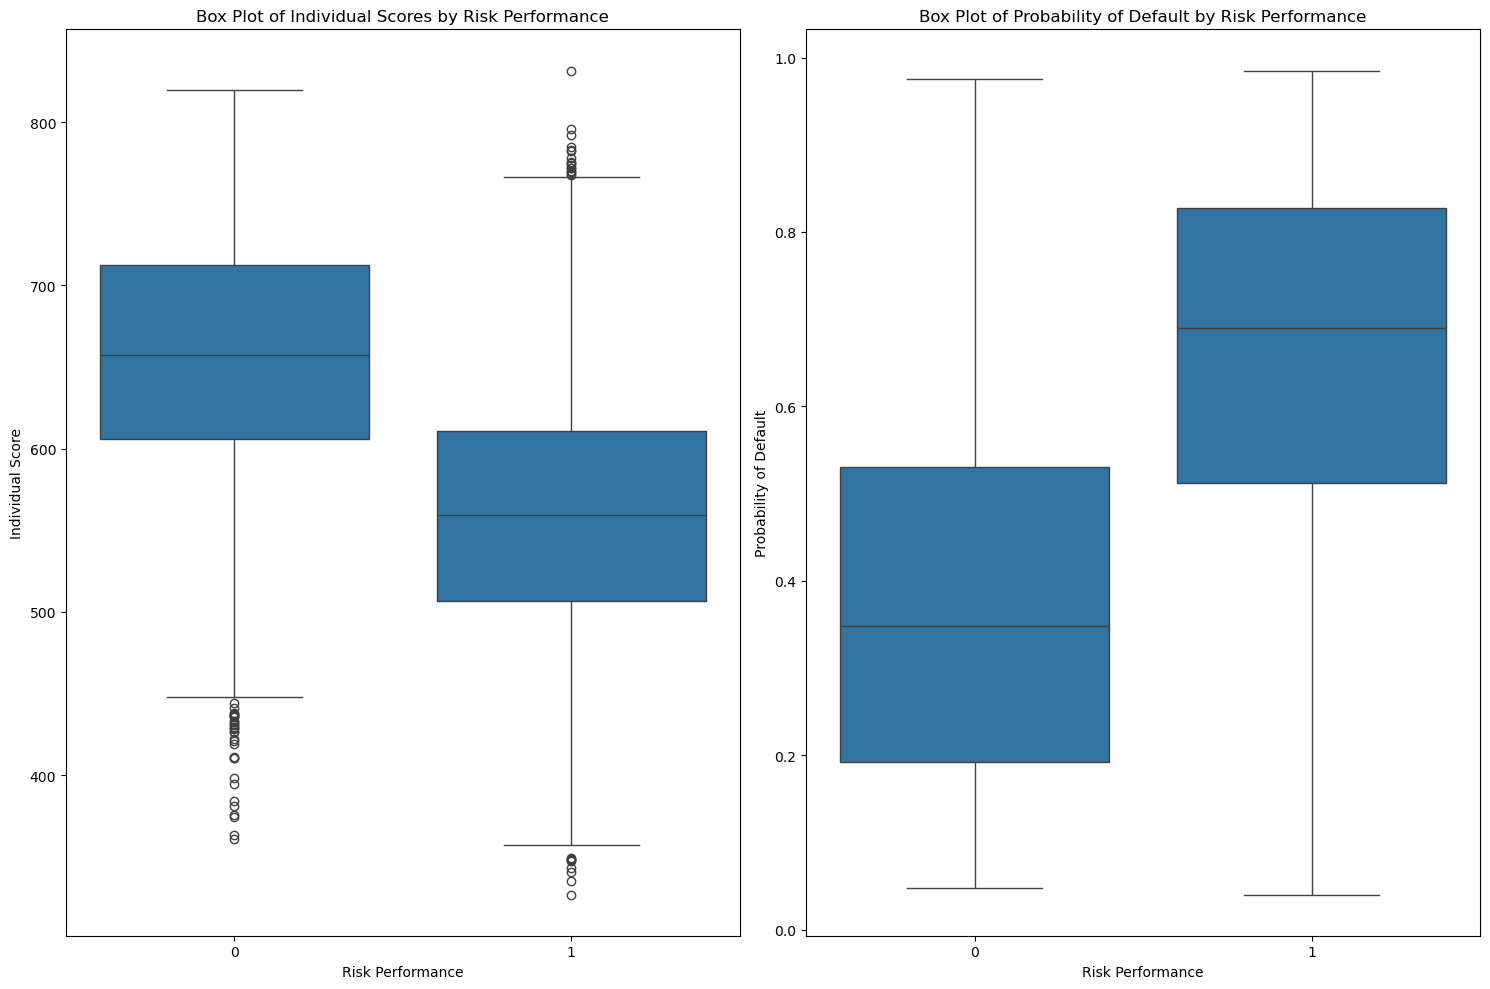

In [59]:
# Create subplots for individual scores and PDs
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Box plot for individual scores
sns.boxplot(ax=axes[0], x='RiskPerformance', y='Individual_Score', data=individual_scores_df)
axes[0].set_title('Box Plot of Individual Scores by Risk Performance')
axes[0].set_xlabel('Risk Performance')
axes[0].set_ylabel('Individual Score')

# Box plot for Probability of Default (PD)
sns.boxplot(ax=axes[1], x='RiskPerformance', y='Probability_of_Default', data=individual_scores_df)
axes[1].set_title('Box Plot of Probability of Default by Risk Performance')
axes[1].set_xlabel('Risk Performance')
axes[1].set_ylabel('Probability of Default')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

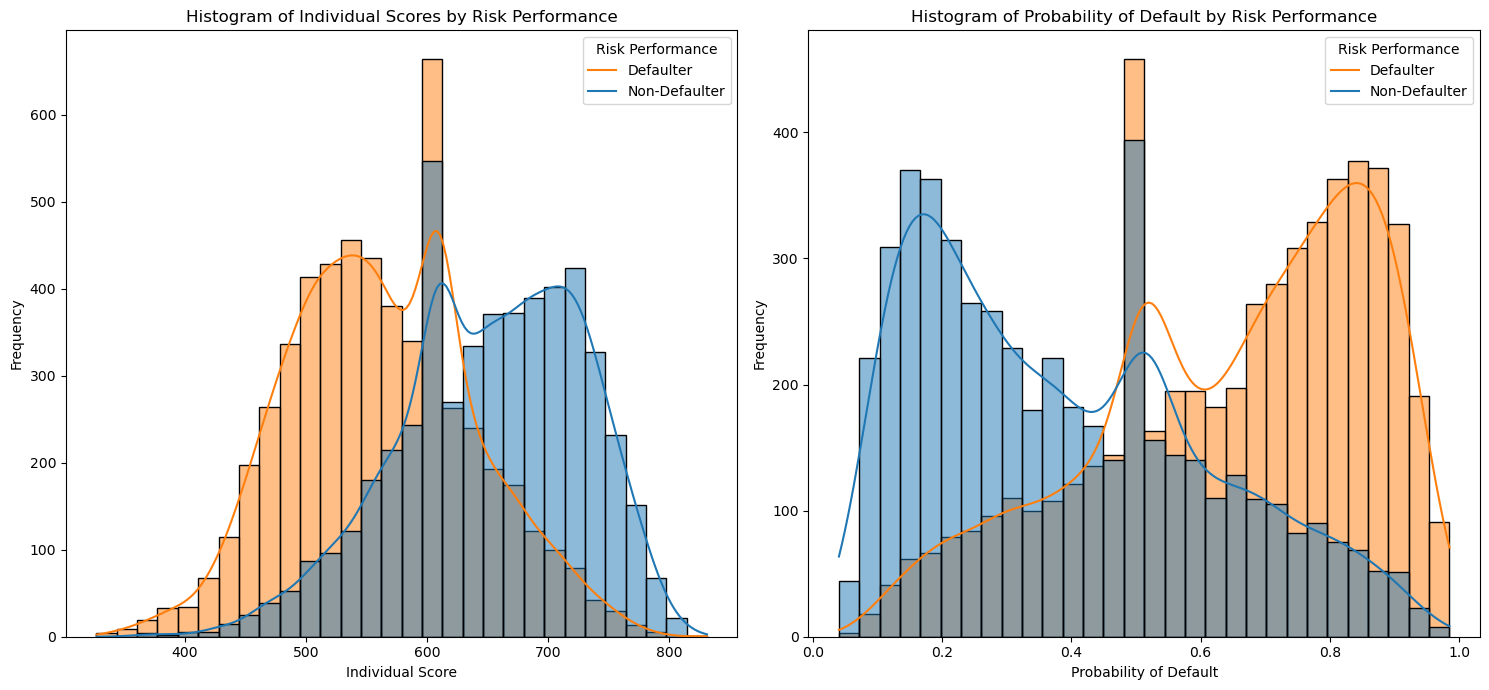

In [60]:
# Create subplots for individual scores and PDs histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Histogram for individual scores
sns.histplot(ax=axes[0], data=individual_scores_df, x='Individual_Score', hue='RiskPerformance', bins=30, kde=True)
axes[0].set_title('Histogram of Individual Scores by Risk Performance')
axes[0].set_xlabel('Individual Score')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Risk Performance', labels=['Defaulter', 'Non-Defaulter']) 

# Histogram for Probability of Default (PD)
sns.histplot(ax=axes[1], data=individual_scores_df, x='Probability_of_Default', hue='RiskPerformance', bins=30, kde=True)
axes[1].set_title('Histogram of Probability of Default by Risk Performance')
axes[1].set_xlabel('Probability of Default')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Risk Performance', labels=['Defaulter', 'Non-Defaulter'])

# Adjust layout and display plots
plt.tight_layout()
plt.show()

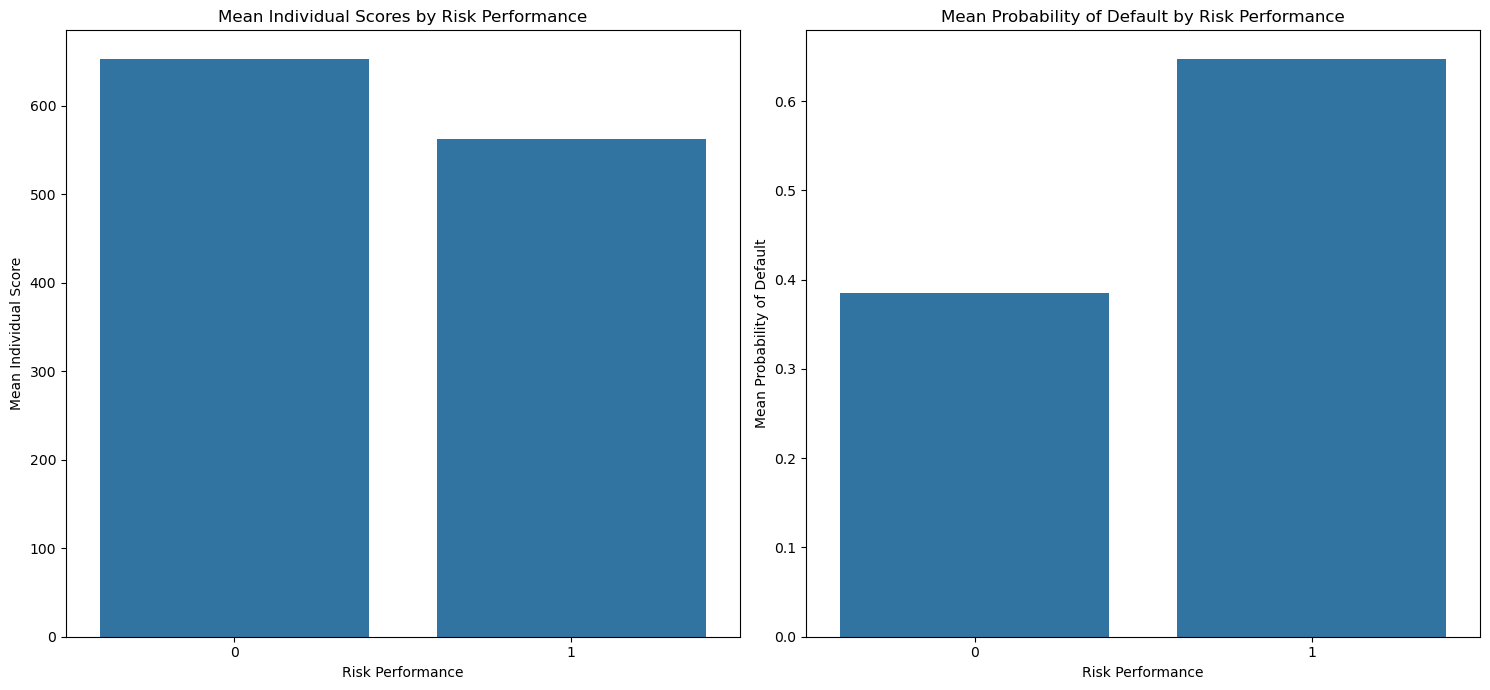

In [61]:
# Create summary statistics for individual scores and PDs
summary_stats_scores = individual_scores_df.groupby('RiskPerformance')['Individual_Score'].agg(['mean', 'median']).reset_index()
summary_stats_pds = individual_scores_df.groupby('RiskPerformance')['Probability_of_Default'].agg(['mean', 'median']).reset_index()

# Create subplots for mean individual scores and mean PDs
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Bar plot for mean individual scores
sns.barplot(ax=axes[0], x='RiskPerformance', y='mean', data=summary_stats_scores)
axes[0].set_title('Mean Individual Scores by Risk Performance')
axes[0].set_xlabel('Risk Performance')
axes[0].set_ylabel('Mean Individual Score')

# Bar plot for mean PDs
sns.barplot(ax=axes[1], x='RiskPerformance', y='mean', data=summary_stats_pds)
axes[1].set_title('Mean Probability of Default by Risk Performance')
axes[1].set_xlabel('Risk Performance')
axes[1].set_ylabel('Mean Probability of Default')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>
<div style="border-top: 15px solid black;"></div> <br>

# SECTION 8: Scorecard Monitoring

It is important to determine if the distribution of new data has shifted with respect to the original data used to develop the scorecard. Also, monitoring is also useful to detect errors in raw data and track scorecard performance.

During the model building and monitoring phases PSI and CSI can be a very powerful metrics. In this article we will try to cover when can we use them and how to use them. Before going into their use, I will try and explain what both PSI and CSI are.

**Population Stability Index (PSI)**: As the name suggests, it looks at the shift of the distribution of a variable across different time internals. Here the focus is only on the dependent variable. the PSI is a divergence measure equivalent to the Information Value (IV), also known as Jeffry’s divergence. This measure assesses whether the actual score distribution has shifted from the expected score distribution

**Characteristic Stability Index (CSI)**: It is the measure of the change in distribution of the independent variables over time. It can be used both for testing and performance tracking in a similar way to PSI, the comparison would be the distribution of variables unlike PSI where it is the model scores.

We split data to compare the robustness of the developed scorecard in the test dataset.

### 1. Import Libraries

In [62]:
from optbinning.scorecard import ScorecardMonitoring

### 2. Loading the Dataset

In [63]:
df = pd.read_csv(r'C:\Users\91989\OneDrive\Desktop\Python Importing Files Project\FICO_HELOC\Newdataset.csv')

### 3. Assigning Independent and Dependent Variables

In [64]:
# Define the list of variable names
variable_names = list(df.columns[1:])

# Create the predictor variable X as a DataFrame
X = df[variable_names]

### 4. Transforming the categorical dichotomic target variable into numerical type.

In [65]:
target = "RiskPerformance"
y = df[target].values
mask = y == "Bad"
y[mask] = 1
y[~mask] = 0
y = y.astype(int)

### 5. Splitting the Data in Training and Testing set (as we want to find PSI)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### 6. Instantiate and Fit the Scorecard

Now, we instantiate a Scorecard class with the target name, a binning process object, and an estimator, and fit with training data. Also, we apply a scaling method to the scorecard points.

In [67]:
scorecard = Scorecard(binning_process=binning_process,
                      estimator=estimator, scaling_method="min_max",
                      scaling_method_params={"min": 0, "max": 100})   # As PSI lies between 0 to 100

In [68]:
scorecard.fit(X_train, y_train, metric_special="empirical", metric_missing="empirical")

Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.02},
                                                             'quality_score': {'min': 0.01}},
                                         special_codes=[-9, -8, -7],
                                         variable_names=['ExternalRiskEstimate',
                                                         'MSinceOldestTradeOpen',
                                                         'MSinceMostRecentTradeOpen',
                                                         'NumSatisfactoryTrades',
                                                         'NumTrades90Ever2DerogPubRec',
                                                         'PercentTradesNeverDelq',
                                                         'MSinceMostRecentDelq',
                                                         'NumTradesOpeninLast12M',
           

### 7. Scorecard Process Statistics

In [69]:
scorecard.information(print_level=2)

optbinning (Version 0.17.3)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                   min_max   * U
    scaling_method_params                yes   * U
    intercept_based                    False   * d
    reverse_scorecard                  False   * d
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                   7321
    Number of variables                   11
    Target type                       binary

    Number of numerical                   11
    Number of categorical                  0
    Number of selected                    10

  Timing
    Total time                          0.71 sec
    Binning process                     0.65 sec   ( 92.17%)
    Estimator                           0.02 sec   (  3.50%

### 8. Discriminate between the Train and Test sets 

Once the scorecard is fitted, we use the ScorecardMonitoring class to ensure that the resulting scorecard is discriminating using train and test data. Furthermore, this class analyzes whether the distribution of train and test data differ significantly. In practice, df_train would be the (expected) data used for scorecard development, whereas df_test would be the (actual) evolved data.

In [70]:
monitoring = ScorecardMonitoring(scorecard=scorecard, psi_method="cart",
                                 psi_n_bins=10, verbose=True)

In [71]:
monitoring.fit(X_test, y_test, X_train, y_train)

2023-12-26 08:39:22,944 | INFO : Monitoring started.
2023-12-26 08:39:22,945 | INFO : Options: check parameters.
2023-12-26 08:39:22,946 | INFO : System stability analysis started.
2023-12-26 08:39:23,038 | INFO : System stability analysis terminated. Time: 0.0904s
2023-12-26 08:39:23,039 | INFO : Variable analysis started.
2023-12-26 08:39:23,070 | INFO : Variable analysis terminated. Time: 0.0304s
2023-12-26 08:39:23,071 | INFO : Monitoring terminated. Time: 0.1271s


C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\scorecard\monitoring.py:787: RuntimeWarning: invalid value encountered in cast
  n_records_a = np.empty(n_bins).astype(np.int64)
C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\scorecard\monitoring.py:788: RuntimeWarning: invalid value encountered in cast
  n_records_e = np.empty(n_bins).astype(np.int64)
C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\scorecard\monitoring.py:787: RuntimeWarning: invalid value encountered in cast
  n_records_a = np.empty(n_bins).astype(np.int64)
C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\optbinning\scorecard\monitoring.py:788: RuntimeWarning: invalid value encountered in cast
  n_records_e = np.empty(n_bins).astype(np.int64)


ScorecardMonitoring(psi_n_bins=10,
                    scorecard=Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 1,
                                                                                                  'min': 0.02},
                                                                                           'quality_score': {'min': 0.01}},
                                                                       special_codes=[-9,
                                                                                      -8,
                                                                                      -7],
                                                                       variable_names=['ExternalRiskEstimate',
                                                                                       'MSinceOldestTradeOpen',
                                                                                       'MSinceMostRecentTradeOpen',
           

### 9. Population Stability Index (PSI)

In [72]:
monitoring.psi_table()

Bin  Count A  Count E  Count A (%)  Count E (%)       PSI
0        (-inf, 25.58)      185      444     0.058955     0.060647  0.000048
1       [25.58, 36.76)      433     1074     0.137986     0.146701  0.000534
2       [36.76, 40.14)      168      412     0.053537     0.056276  0.000137
3       [40.14, 45.58)      307      645     0.097833     0.088103  0.001019
4       [45.58, 49.74)      192      496     0.061185     0.067750  0.000669
5       [49.74, 58.61)      622     1445     0.198215     0.197377  0.000004
6       [58.61, 65.94)      358      827     0.114085     0.112963  0.000011
7       [65.94, 69.67)      149      375     0.047482     0.051223  0.000284
8       [69.67, 76.85)      326      667     0.103888     0.091108  0.001678
9         [76.85, inf)      398      936     0.126832     0.127851  0.000008
Totals                     3138     7321     1.000000     1.000000  0.004391

We can plot the PSI table using method ***psi_plot***, where the population distribution and event rate for each bin (Bin ID) are shown.

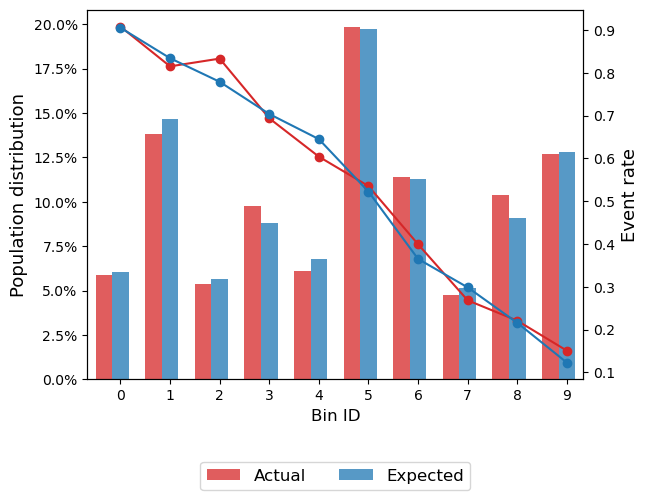

In [73]:
monitoring.psi_plot()

This analysis computes statistical tests to determine if the event rate on train and test data are significantly different using the Chi-square test. The null hypothesis is that actual = expected.

In [74]:
monitoring.tests_table()

Bin  Count A  Count E  Event rate A  Event rate E  statistic  \
0   (-inf, 25.58)      185      444      0.908108      0.905405   0.011222   
1  [25.58, 36.76)      433     1074      0.815242      0.834264   0.786924   
2  [36.76, 40.14)      168      412      0.833333      0.779126   2.150301   
3  [40.14, 45.58)      307      645      0.693811      0.703876   0.100458   
4  [45.58, 49.74)      192      496      0.604167      0.645161   1.002162   
5  [49.74, 58.61)      622     1445      0.535370      0.522491   0.289276   
6  [58.61, 65.94)      358      827      0.399441      0.365175   1.250956   
7  [65.94, 69.67)      149      375      0.268456      0.298667   0.472576   
8  [69.67, 76.85)      326      667      0.220859      0.215892   0.031738   
9    [76.85, inf)      398      936      0.150754      0.122863   1.905928   

    p-value  
0  0.915634  
1  0.375032  
2  0.142542  
3  0.751281  
4  0.316788  
5  0.590685  
6  0.263370  
7  0.491804  
8  0.858604  
9  0.167416

### 10. Characteristic Stability Index (CSI)

The ***ScorecardMonitoring*** also implements functionalities to perform the characteristic stability report. The ***psi_variable_table*** method returns the PSI using the optimal bins incorporated in the scorecard at a characteristic level.

In [75]:
monitoring.psi_variable_table(style="summary")

Variable       PSI
0          ExternalRiskEstimate  0.003432
1          MSinceMostRecentDelq  0.001042
2  MSinceMostRecentInqexcl7days  0.001249
3     MSinceMostRecentTradeOpen  0.000180
4         MSinceOldestTradeOpen  0.002839
5    NetFractionRevolvingBurden  0.004657
6                  NumInqLast6M  0.001527
7   NumTrades90Ever2DerogPubRec  0.000495
8        NumTradesOpeninLast12M  0.001805
9        PercentTradesNeverDelq  0.002862

In [76]:
monitoring.psi_variable_table(style="detailed")

Variable               Bin  Count A  Count E  \
0           ExternalRiskEstimate     (-inf, 59.50)      494     1185   
1           ExternalRiskEstimate    [59.50, 63.50)      326      771   
2           ExternalRiskEstimate    [63.50, 65.50)      193      488   
3           ExternalRiskEstimate    [65.50, 67.50)      205      447   
4           ExternalRiskEstimate    [67.50, 70.50)      302      736   
5           ExternalRiskEstimate    [70.50, 73.50)      327      684   
6           ExternalRiskEstimate    [73.50, 76.50)      253      614   
7           ExternalRiskEstimate    [76.50, 78.50)      148      387   
8           ExternalRiskEstimate    [78.50, 81.50)      256      588   
9           ExternalRiskEstimate    [81.50, 84.50)      243      529   
10          ExternalRiskEstimate    [84.50, 87.50)      204      463   
11          ExternalRiskEstimate      [87.50, inf)      187      429   
0          MSinceOldestTradeOpen     (-inf, 66.50)      428     1001   
1          MSinceOldestTradeOpen    [66.50, 92.50)      160      399   
2          MSinceOldestTradeOpen   [92.50, 124.50)      265      561   
3          MSinceOldestTradeOpen  [124.50, 149.50)      310      716   
4          MSinceOldestTradeOpen  [149.50, 169.50)      275      728   
5          MSinceOldestTradeOpen  [169.50, 217.50)      662     1494   
6          MSinceOldestTradeOpen  [217.50, 266.50)      397      905   
7          MSinceOldestTradeOpen  [266.50, 343.50)      378      891   
8          MSinceOldestTradeOpen     [343.50, inf)      263      626   
0      MSinceMostRecentTradeOpen      (-inf, 1.50)      427      999   
1      MSinceMostRecentTradeOpen      [1.50, 3.50)      657     1519   
2      MSinceMostRecentTradeOpen      [3.50, 9.50)     1128     2623   
3      MSinceMostRecentTradeOpen     [9.50, 19.50)      610     1414   
4      MSinceMostRecentTradeOpen      [19.50, inf)      316      766   
0    NumTrades90Ever2DerogPubRec      (-inf, 0.50)     2485     5742   
1    NumTrades90Ever2DerogPubRec      [0.50, 1.50)      426     1010   
2    NumTrades90Ever2DerogPubRec       [1.50, inf)      227      569   
0         PercentTradesNeverDelq     (-inf, 76.50)      449     1105   
1         PercentTradesNeverDelq    [76.50, 84.50)      228      505   
2         PercentTradesNeverDelq    [84.50, 88.50)      203      443   
3         PercentTradesNeverDelq    [88.50, 91.50)      164      447   
4         PercentTradesNeverDelq    [91.50, 94.50)      276      671   
5         PercentTradesNeverDelq    [94.50, 96.50)      234      559   
6         PercentTradesNeverDelq      [96.50, inf)     1584     3591   
0           MSinceMostRecentDelq      (-inf, 3.50)     1911     4473   
1           MSinceMostRecentDelq      [3.50, 8.50)      269      593   
2           MSinceMostRecentDelq     [8.50, 15.50)      233      544   
3           MSinceMostRecentDelq    [15.50, 23.50)      182      439   
4           MSinceMostRecentDelq    [23.50, 33.50)      163      382   
5           MSinceMostRecentDelq    [33.50, 47.50)      174      374   
6           MSinceMostRecentDelq      [47.50, inf)      206      516   
0         NumTradesOpeninLast12M      (-inf, 0.50)      925     2171   
1         NumTradesOpeninLast12M      [0.50, 1.50)      730     1798   
2         NumTradesOpeninLast12M      [1.50, 2.50)      598     1371   
3         NumTradesOpeninLast12M      [2.50, 3.50)      414      888   
4         NumTradesOpeninLast12M      [3.50, 4.50)      229      515   
5         NumTradesOpeninLast12M       [4.50, inf)      242      578   
0   MSinceMostRecentInqexcl7days      (-inf, 0.50)     2223     5278   
1   MSinceMostRecentInqexcl7days      [0.50, 1.50)      189      425   
2   MSinceMostRecentInqexcl7days      [1.50, 8.50)      490     1057   
3   MSinceMostRecentInqexcl7days       [8.50, inf)      236      561   
0                   NumInqLast6M      (-inf, 0.50)     1325     3187   
1                   NumInqLast6M      [0.50, 1.50)      756     